In [58]:
# Import libraries

import warnings
warnings.filterwarnings('ignore')

from keras import models, layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [71]:
# load MNIST dataset

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [60]:
# train and test sizes

train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

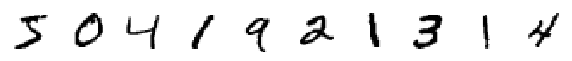

In [61]:
# show sample train images
_, ax = plt.subplots(1, 10, figsize=(10,10))

for i in range(0, 10):
    ax[i].axis('off')
    ax[i].imshow(train_images[i], cmap=plt.cm.binary)

In [74]:
# reshape for tenserflow backend
reshaped_train_images = train_images.reshape((60000, 28, 28, 1))
reshaped_test_images = test_images.reshape((10000, 28, 28, 1))

# rescale pixel values from range [0, 255] to [0, 1]
rescaled_train_images= reshaped_train_images.astype('float32') / 255 
rescaled_test_images= reshaped_test_images.astype('float32') / 255

# converts a class vector (integers) to binary class matrix
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# get test set
final_test_labels = test_labels
final_test_images = rescaled_test_images

# get validation set
validation_images = rescaled_train_images[50000:]
validation_labels = train_labels[50000:]

# get train set
final_train_images = rescaled_train_images[:50000]
final_train_labels = train_labels[:50000]

In [63]:
# function to build a CNN model

def create_model():
    # Convolutional model
    model = models.Sequential()

    # Conv Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    
    # Pool Layer 1
    model.add(layers.MaxPooling2D((2, 2)))

    # Conv Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    # Pool Layer 2
    model.add(layers.MaxPooling2D((2, 2)))

    # Conv Layer 3
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    # Flatten Layer 1
    model.add(layers.Flatten())

    # Fully-connected layer 1
    model.add(layers.Dense(64, activation='relu'))
    
    # Fully-connected layer 2
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [64]:
# build a model
model = create_model()

In [65]:
# get a summary of the model
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)               

In [66]:
# Train the model
model.fit(final_train_images, final_train_labels, epochs=5, batch_size=64, validation_data=(validation_images, validation_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 12s 233us/step - loss: 0.2013 - accuracy: 0.9359 - val_loss: 0.0669 - val_accuracy: 0.9829
Epoch 2/5
50000/50000 [==============================] - 14s 270us/step - loss: 0.0535 - accuracy: 0.9830 - val_loss: 0.1075 - val_accuracy: 0.9715
Epoch 3/5
50000/50000 [==============================] - 16s 317us/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0516 - val_accuracy: 0.9843
Epoch 4/5
50000/50000 [==============================] - 14s 288us/step - loss: 0.0280 - accuracy: 0.9907 - val_loss: 0.0472 - val_accuracy: 0.9877
Epoch 5/5
50000/50000 [==============================] - 16s 316us/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0385 - val_accuracy: 0.9901


In [67]:
# Accuracy of the model against test set

test_loss, test_acc = model.evaluate(final_test_images, final_test_labels, verbose=1)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

10000/10000 [==============================] - 1s 80us/step
Accuracy: 0.9900000095367432
Loss:  0.030065474145036023
